In [108]:
import gzip
import csv
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn
from gensim.models import Word2Vec
from nltk.stem.porter import *
from sklearn import linear_model
from sklearn.manifold import TSNE
import numpy as np
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qq575\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def read_CSV(path):
    with open(path, 'r',encoding="utf-8") as f:
        for line in csv.DictReader(f):
            yield line

In [22]:
data = list(read_CSV("RAW_interactions.csv"))

In [21]:
data[0]

{'user_id': '38094',
 'recipe_id': '40893',
 'date': '2003-02-17',
 'rating': '4',
 'review': 'Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt.  Used low fat sour cream.  Thanks.'}

In [109]:
wordCount = defaultdict(int)
for d in data:
    for w in d['review'].split():
        wordCount[w] += 1

len(wordCount)

713845

In [112]:
dSize = 2000
tolower=True
removePunct=True

wordCount = defaultdict(int)
punctuation = set(string.punctuation)
for d in data: # Strictly, should just use the *training* data to extract word counts
    r = d['review']
    if tolower:
        r = r.lower()
    if removePunct:
        r = ''.join([c for c in r if not c in punctuation])
    for w in r.split():
        wordCount[w] += 1

counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()

words = [x[1] for x in counts[:dSize]]

wordId = dict(zip(words, range(len(words))))
wordSet = set(words)



In [114]:
def feature(datum, words, wordId, tolower=True, removePunct=True):
    feat = [0]*len(words)
    r = datum['review']
    if tolower:
        r = r.lower()
    if removePunct:
        r = ''.join([c for c in r if not c in punctuation])
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) 
    return feat

In [115]:
X = [feature(d, words, wordId, tolower, removePunct) for d in data]
y = [int(d['rating']) for d in data]

In [116]:
len(X),len(y)

(1132367, 1132367)

In [117]:
Ntrain,Nvalid,Ntest = 1100000,15000,15000
Xtrain,Xvalid,Xtest = X[:Ntrain],X[Ntrain:Ntrain+Nvalid],X[Ntrain+Nvalid:]
ytrain,yvalid,ytest = y[:Ntrain],y[Ntrain:Ntrain+Nvalid],y[Ntrain+Nvalid:]

In [118]:
ytrain = numpy.array(ytrain)

l = 0.01, validation MSE = 1.2496679508046218
l = 0.1, validation MSE = 1.2496676828565394
l = 1, validation MSE = 1.2496650067289181
l = 10, validation MSE = 1.249638578713635
l = 100, validation MSE = 1.2494056813723995
l = 1000, validation MSE = 1.2489943453525172
l = 10000, validation MSE = 1.2647839880212952


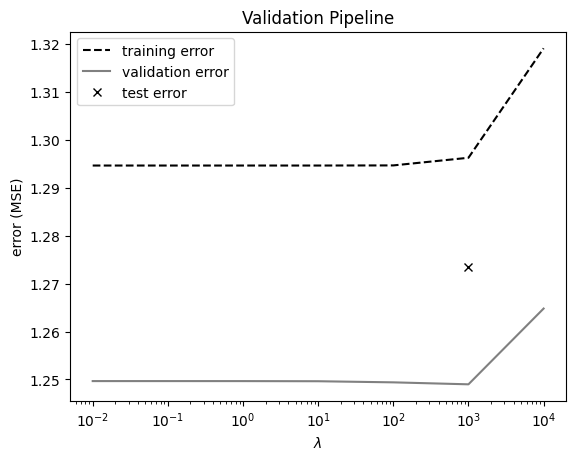

In [119]:
ls = [0.01, 0.1, 1, 10, 100, 1000, 10000]
errorTrain = []
errorValid = []

for l in ls:
    model = sklearn.linear_model.Ridge(l)
    model.fit(Xtrain, ytrain)
    predictTrain = model.predict(Xtrain)
    MSEtrain = sum((ytrain - predictTrain)**2)/len(ytrain)
    errorTrain.append(MSEtrain)
    predictValid = model.predict(Xvalid)
    MSEvalid = sum((yvalid - predictValid)**2)/len(yvalid)
    errorValid.append(MSEvalid)
    print("l = " + str(l) + ", validation MSE = " + str(MSEvalid))
    if bestVal == None or MSEvalid < bestVal:
        bestVal = MSEvalid
        bestModel = model
        bestLamb = l
        
predictTest = bestModel.predict(Xtest)
MSEtest = sum((ytest - predictTest)**2)/len(ytest)
MSEtest

plt.xticks([])
plt.xlabel(r"$\lambda$")
plt.ylabel(r"error (MSE)")
plt.title(r"Validation Pipeline")
plt.xscale('log')
plt.plot(ls, errorTrain, color='k', linestyle='--', label='training error')
plt.plot(ls, errorValid, color='grey',zorder=4,label="validation error")
plt.plot([bestLamb], [MSEtest], linestyle='', marker='x', color='k', label="test error")
plt.legend(loc='best')
plt.show()

It performs best when l=1000

In [120]:
l = 1000

model = sklearn.linear_model.Ridge(l)
model.fit(Xtrain, ytrain)
predictTrain = model.predict(Xtrain)
MSEtrain = sum((ytrain - predictTrain)**2)/len(ytrain)
errorTrain.append(MSEtrain)
predictValid = model.predict(Xvalid)
MSEvalid = sum((yvalid - predictValid)**2)/len(yvalid)
errorValid.append(MSEvalid)
print("l = " + str(l) + ", validation MSE = " + str(MSEvalid))
if bestVal == None or MSEvalid < bestVal:
    bestVal = MSEvalid
    bestModel = model
    bestLamb = l
        
predictTest = bestModel.predict(Xtest)

l = 1000, validation MSE = 1.2489943453525172


The threshold is set to 0.3, and the predicted score can be considered successful within this error range.

In [121]:
good_pred = 0
for i in range(len(predictValid)):
    if abs(predictValid[i]-yvalid[i] <= 0.3):
        good_pred += 1
    
good_pred

11884

In [122]:
rate = good_pred/len(predictValid)
rate

0.7922666666666667

测试组的评分预测误差在0.3内的有79%

以下的都是废旧代码，请无视


In [81]:

bestModel = None
bestVal = None
bestLamb = None

l  = 1
model = sklearn.linear_model.Ridge(l)
model.fit(Xtrain, ytrain)
predictTrain = model.predict(Xtrain)

In [83]:
#predictTrain = predictTrain.tolist()
ytrain = numpy.array(ytrain)

In [84]:
type(predictTrain) , type(ytrain)

(numpy.ndarray, numpy.ndarray)

In [85]:
type(ytrain[0])

numpy.int32

In [86]:
len(predictTrain), type(len(ytrain))

(4000, int)

In [79]:
sub_list = []
for i in range(len(predictTrain)):
    temp = abs(predictTrain[i]-ytrain[i])**2
    sub_list.append(temp)

sub_list

[0.06585118278902542,
 0.06018436795809025,
 0.1335383631625448,
 0.06410177324195176,
 1.2256970747072184,
 0.013352441114445395,
 0.8151388392966087,
 2.519593532753019,
 0.0452239145701476,
 0.9084122265684479,
 0.24675669261241265,
 0.004854911829637768,
 3.908026654317203,
 0.011225840083745752,
 0.005554986986167048,
 0.47729288003847103,
 0.42881973210402613,
 0.055061081340490405,
 0.1092859226577798,
 0.00021898225096033034,
 0.3776957492200108,
 0.08838711561486831,
 0.05413936385403986,
 21.904864667705766,
 0.17241689867861362,
 0.21763927367736513,
 0.00020897494343236433,
 1.026247698095997,
 0.06104234508652236,
 0.732415572315633,
 0.3550397132665512,
 0.0647506587085628,
 0.7953757180146429,
 0.0031119418740019906,
 0.30828669682683696,
 0.0010739193078989147,
 2.023777545028868,
 0.659624426964037,
 0.13345502561910033,
 18.00510355466768,
 0.032399750222475016,
 4.783161271943212,
 0.013073649240002464,
 0.011503185009390002,
 0.5026819626260439,
 0.02868554862840605

In [87]:
MSEtrain = sum((ytrain - predictTrain)**2)/len(ytrain)

In [98]:


predictValid = model.predict(Xvalid)
MSEvalid = sum((yvalid - predictValid)**2)/len(yvalid)
print("l = " + str(l) + ", validation MSE = " + str(MSEvalid))

l = 1, validation MSE = 1.8570212480729402


In [99]:
type(predictValid)

numpy.ndarray

In [ ]:
predictValid = predictValid.tolist()

In [102]:
len(predictValid)

500

In [104]:

good_pred = 0
for i in range(len(predictValid)):
    if abs(predictValid[i]-yvalid[i] < 0.4):
        good_pred += 1
    
good_pred

352

In [106]:
rate = good_pred/len(predictValid)
rate

0.704

评分预测误差在0.4内的有70%

In [ ]:

''' 来自note8的示例代码 不用管'''
bestModel = None
bestVal = None
bestLamb = None

ls = [0.01, 0.1, 1, 10, 100, 1000, 10000]
errorTrain = []
errorValid = []

for l in ls:
    model = sklearn.linear_model.Ridge(l)
    model.fit(Xtrain, ytrain)
    predictTrain = model.predict(Xtrain)
    MSEtrain = sum((ytrain - predictTrain)**2)/len(ytrain)
    errorTrain.append(MSEtrain)
    predictValid = model.predict(Xvalid)
    MSEvalid = sum((yvalid - predictValid)**2)/len(yvalid)
    errorValid.append(MSEvalid)
    print("l = " + str(l) + ", validation MSE = " + str(MSEvalid))
    if bestVal == None or MSEvalid < bestVal:
        bestVal = MSEvalid
        bestModel = model
        bestLamb = l
        
predictTest = bestModel.predict(Xtest)
MSEtest = sum((ytest - predictTest)**2)/len(ytest)
MSEtest

plt.xticks([])
plt.xlabel(r"$\lambda$")
plt.ylabel(r"error (MSE)")
plt.title(r"Validation Pipeline")
plt.xscale('log')
plt.plot(ls, errorTrain, color='k', linestyle='--', label='training error')
plt.plot(ls, errorValid, color='grey',zorder=4,label="validation error")
plt.plot([bestLamb], [MSEtest], linestyle='', marker='x', color='k', label="test error")
plt.legend(loc='best')
plt.show()

In [ ]:

''' 来自note8的示例代码 不用管'''
def pipeline(dSize = 1000, tolower=True, removePunct=True):
    wordCount = defaultdict(int)
    punctuation = set(string.punctuation)
    for d in data: # Strictly, should just use the *training* data to extract word counts
        r = d['review']
        if tolower:
            r = r.lower()
        if removePunct:
            r = ''.join([c for c in r if not c in punctuation])
        for w in r.split():
            wordCount[w] += 1

    counts = [(wordCount[w], w) for w in wordCount]
    counts.sort()
    counts.reverse()
    
    words = [x[1] for x in counts[:dSize]]
    
    wordId = dict(zip(words, range(len(words))))
    wordSet = set(words)
    
    X = [feature(d, words, wordId, tolower, removePunct) for d in data]
    y = [d['rating'] for d in data]
    
    Ntrain,Nvalid,Ntest = 4000,500,500
    Xtrain,Xvalid,Xtest = X[:Ntrain],X[Ntrain:Ntrain+Nvalid],X[Ntrain+Nvalid:]
    ytrain,yvalid,ytest = y[:Ntrain],y[Ntrain:Ntrain+Nvalid],y[Ntrain+Nvalid:]
    
    bestModel = None
    bestVal = None
    bestLamb = None
    
    ls = [0.01, 0.1, 1, 10, 100, 1000, 10000]
    errorTrain = []
    errorValid = []

    for l in ls:
        model = sklearn.linear_model.Ridge(l)
        model.fit(Xtrain, ytrain)
        predictTrain = model.predict(Xtrain)
        MSEtrain = sum((ytrain - predictTrain)**2)/len(ytrain)
        errorTrain.append(MSEtrain)
        predictValid = model.predict(Xvalid)
        MSEvalid = sum((yvalid - predictValid)**2)/len(yvalid)
        errorValid.append(MSEvalid)
        print("l = " + str(l) + ", validation MSE = " + str(MSEvalid))
        if bestVal == None or MSEvalid < bestVal:
            bestVal = MSEvalid
            bestModel = model
            bestLamb = l
            
    predictTest = bestModel.predict(Xtest)
    MSEtest = sum((ytest - predictTest)**2)/len(ytest)
    MSEtest
    
    plt.xticks([])
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"error (MSE)")
    plt.title(r"Validation Pipeline")
    plt.xscale('log')
    plt.plot(ls, errorTrain, color='k', linestyle='--', label='training error')
    plt.plot(ls, errorValid, color='grey',zorder=4,label="validation error")
    plt.plot([bestLamb], [MSEtest], linestyle='', marker='x', color='k', label="test error")
    plt.legend(loc='best')
    plt.show()